# 데이터 작업

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
training_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print("Shape of X: {}".format(X.shape))
  print("Shape of y: {}, {}".format(y.shape, y.dtype))
  break

Shape of X: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]), torch.int64


# 모델 만들기

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.flatten(x) # 1차원으로 쫙 펴기
    logits = self.linear_relu_stack(x)
    return logits

cpu


In [7]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [9]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(dim=1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9])


# 모델 계층

In [10]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [13]:
# nn.Flatten 계층을 초기화하여 각 28x28의 2D 이미지를 784 픽셀 값을 갖는 연속된 배열로 변환합니다. (dim=0의 미니배치 차원은 유지됩니다.)
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size()) 

torch.Size([3, 784])


In [14]:
# 선형 계층 은 저장된 가중치(weight)와 편향(bias)을 사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈입니다.
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [15]:
'''
비선형 활성화(activation)는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만듭니다. 
비선형 활성화는 선형 변환 후에 적용되어 비선형성(nonlinearity) 을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕습니다.
'''
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2854,  0.0617, -0.0039, -0.1121, -0.0686, -0.1028,  0.1941, -0.2688,
          0.1709, -0.7030,  0.2583, -0.0838, -0.1127, -0.2683, -0.1133,  0.2895,
         -0.4757, -0.2700, -0.5805, -0.4754],
        [ 0.2330,  0.0247,  0.1465, -0.1953,  0.0991,  0.1690,  0.3580, -0.4325,
          0.3930, -0.4479,  0.3046, -0.4367, -0.3133, -0.0666, -0.0496,  0.5639,
         -0.2432, -0.5228, -0.5780, -0.1849],
        [ 0.1674, -0.1717,  0.2609, -0.2606, -0.3951, -0.3328, -0.1334, -0.3028,
          0.3126, -0.3458,  0.2230, -0.1963, -0.1654, -0.2685, -0.2831,  0.5917,
         -0.3120, -0.1584, -0.3643, -0.3642]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2854, 0.0617, 0.0000, 0.0000, 0.0000, 0.0000, 0.1941, 0.0000, 0.1709,
         0.0000, 0.2583, 0.0000, 0.0000, 0.0000, 0.0000, 0.2895, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.2330, 0.0247, 0.1465, 0.0000, 0.0991, 0.1690, 0.3580, 0.0000, 0.3930,
         0.0000, 0.3046, 0.0000, 0.0000, 0.0000, 0.00

In [17]:
'''
nn.Sequential 은 순서를 갖는 모듈의 컨테이너입니다. 
데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다. 
순차 컨테이너(sequential container)를 사용하여 아래의 seq_modules 와 같은 신경망을 빠르게 만들 수 있습니다.
'''
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [18]:
'''
신경망의 마지막 선형 계층은 nn.Softmax 모듈에 전달될 ([-infty, infty] 범위의 원시 값(raw value)인) logits 를 반환합니다. 
logits는 모델의 각 분류(class)에 대한 예측 확률을 나타내도록 [0, 1] 범위로 비례하여 조정(scale)됩니다. dim 매개변수는 값의 합이 1이 되는 차원을 나타냅니다.
'''
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

# 모델 매개변수

In [19]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0341, -0.0089,  0.0289,  ...,  0.0182,  0.0172, -0.0352],
        [ 0.0057,  0.0357, -0.0190,  ..., -0.0276,  0.0347, -0.0340]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0141, -0.0081], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0236,  0.0406,  0.0009,  ..., -0.0115, -0.0002,  0.0067],
        [ 0.0432,  0.0360, -0.0230,  ..., -0.0323,  0.0115, -0.0144]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

# DATASET과 DATALOADER

`
TorchVision 에서 Fashion-MNIST 데이터셋을 불러오는 예제를 살펴보겠습니다. Fashion-MNIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습 예제와 10,000개의 테스트 예제로 이루어져 있습니다. 각 예제는 흑백(grayscale)의 28x28 이미지와 10개 분류(class) 중 하나인 정답(label)으로 구성됩니다.
`

In [23]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
    )

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

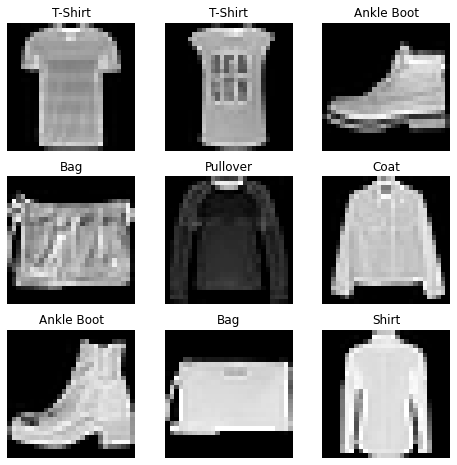

torch.Size([1, 28, 28])


In [25]:
# 데이터셋을 순회하고 시각화하기

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # Pytorch에서 tensor에 저장된 값만을 가져오는 방법.
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

print(img.shape)

In [26]:
# DataLoader로 학습용 데이터 준비하기

from torch.utils.data import DataLoader

'''
Dataset 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 
모델을 학습할 때, 일반적으로 샘플들을 《미니배치(minibatch)》로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, 
Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.
'''
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


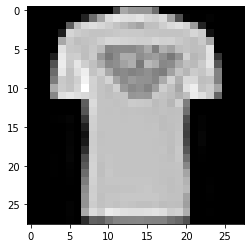

Label: 0


In [27]:
# DataLoader를 통해 순회하기(iterate)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')

# 하이퍼파라미터(Hyperparameter)

학습 시에는 다음과 같은 하이퍼파라미터를 정의합니다:
* 에폭(epoch) 수 - 데이터셋을 반복하는 횟수

* 배치 크기(batch size) - 매개변수가 갱신되기 전 신경망을 통해 전파된 데이터 샘플의 수

* 학습률(learning rate) - 각 배치/에폭에서 모델의 매개변수를 조절하는 비율. 값이 작을수록 학습 속도가 느려지고, 값이 크면 학습 중 예측할 수 없는 동작이 발생할 수 있습니다.

```python
learning_rate = 1e-3
batch_size = 64
epochs = 5
```

# 최적화 단계(Optimization Loop)

하이퍼파라미터를 설정한 뒤에는 최적화 단계를 통해 모델을 학습하고 최적화할 수 있습니다. 최적화 단계의 각 반복(iteration)을 에폭이라고 부릅니다.

하나의 에폭은 다음 두 부분으로 구성됩니다:
* 학습 단계(train loop) - 학습용 데이터셋을 반복(iterate)하고 최적의 매개변수로 수렴합니다.

* 검증/테스트 단계(validation/test loop) - 모델 성능이 개선되고 있는지를 확인하기 위해 테스트 데이터셋을 반복(iterate)합니다.


In [29]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [30]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [31]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298210  [    0/60000]
loss: 2.284502  [ 6400/60000]
loss: 2.285242  [12800/60000]
loss: 2.257149  [19200/60000]
loss: 2.248290  [25600/60000]
loss: 2.224874  [32000/60000]
loss: 2.224007  [38400/60000]
loss: 2.170362  [44800/60000]
loss: 2.175307  [51200/60000]
loss: 2.138695  [57600/60000]
Test Error: 
 Accuracy: 50.6%, Avg loss: 2.147887 

Epoch 2
-------------------------------
loss: 2.133200  [    0/60000]
loss: 2.117222  [ 6400/60000]
loss: 2.090913  [12800/60000]
loss: 2.080901  [19200/60000]
loss: 2.036150  [25600/60000]
loss: 2.055633  [32000/60000]
loss: 2.010106  [38400/60000]
loss: 1.968416  [44800/60000]
loss: 1.931362  [51200/60000]
loss: 1.867797  [57600/60000]
Test Error: 
 Accuracy: 60.9%, Avg loss: 1.880088 

Epoch 3
-------------------------------
loss: 1.903786  [    0/60000]
loss: 1.860684  [ 6400/60000]
loss: 1.829000  [12800/60000]
loss: 1.720201  [19200/60000]
loss: 1.718052  [25600/60000]
loss: 1.667581  [32000/600

# 
추론(inference)을 하기 전에 
```python
model.eval()
```
메소드를 호출하여 드롭아웃(dropout)과 배치 정규화(batch normalization)를 평가 모드(evaluation mode)로 설정해야 합니다. 그렇지 않으면 일관성 없는 추론 결과가 생성됩니다.